# Task 1: Sentiment Analysis

# Contents:
- [Introduction](#section-one)
- [Stage 1: Data Acquisition](#section-two)
- [Stage 2: Data Preprocessing](#section-three)
- [Stage 3: Model Building and Training](#section-four)
- [Stage 4: Model Testing](#section-five)
- [Conclusion](#section-six)

## Introduction <a id="section-one"></a>
The world has rapidly embraced e-commerce platforms, leading to a significant boom in online shopping. In recent times, an increasing number of people are taking advantage of the convenience of shopping from their homes. The rise in e-commerce platforms has resulted in a reduction in the number of middlemen, allowing goods to be offered at competitive prices with regular discounts.

However, the primary drawback of online shopping has been the lack of physical touch and inspection before purchasing a product. This is where the concept of leaving reviews acts as a savior. Reviews play a crucial role in helping potential customers make informed purchasing decisions. A typical review consists of a rating (usually out of 5), a title/summary, and the main body of the review.

While it may seem that reviews are primarily beneficial for potential customers, they also hold significant importance for companies aiming to enhance their products and services through analysis. However, manually inspecting individual reviews can feel like a perpetual task. This is where Sentiment Analysis in the field of Natural Language Processing (NLP) can truly work wonders.

### What is sentiment analysis?
Sentiment Analysis is a commonly used text classification tool in the field of Natural Language Processing (NLP) that analyzes text and tries to detect the underlying sentiment. It's also known as opinion mining. Businesses can leverage this information to improve their products and services, as the sentiments are conveyed directly by the end consumers. E-commerce has made obtaining direct feedback from customers a breeze, as almost all online shopping websites allow dropping reviews. With Sentiment Analysis, customer feedback can be analyzed in bulk to improvise products and services for better customer satisfaction.

### Problem statement
The objective of this research project is to explore and analyze customer reviews in the e-commerce domain using Natural Language Processing (NLP) techniques. The growing importance of customer reviews in the decision-making process of online shoppers has made sentiment analysis and opinion mining crucial for e-commerce businesses. By employing NLP methods on a large corpus of e-commerce reviews, this research aims to extract valuable insights, sentiment patterns, and consumer preferences to help businesses make data-driven decisions and improve customer satisfaction.

### Objectives of Project
This research aims to contribute to the field of NLP and help e-commerce businesses make informed decisions to enhance customer satisfaction and overall performance.

# Stage 1: DATA ACQUISITION <a id="section-two"></a>
Objectives:
- Importing the necessary libraries
- Importing the dataset
- Explorarory Data Analysis

## Importing the necessary libraries

In [ ]:
#Basic Libraries
import numpy as np
import pandas as pd
import pickle

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Preprocessing
import re
import string
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

#Modeling
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import accuracy_score

## Importing the database

In [ ]:
reviews = pd.read_csv('/Users/vedansh/Documents/Projects/Internship 1/reviews_amazon.csv')

Source of the dataset:
https://www.kaggle.com/datasets/jillanisofttech/amazon-product-reviews

## Exploratory Data Analysis (EDA)

In [ ]:
reviews.head(n=3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [ ]:
reviews.tail(n=3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...
568453,568454,B001LR2CU2,A3LGQPJCZVL9UC,srfell17,0,0,5,1338422400,Great Honey,"I am very satisfied ,product is as advertised,..."


In [ ]:
#Reviewing the number of rows and columns
reviews.shape

(568454, 10)

In [ ]:
#Reviewing the various column names
reviews.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
#Checking if the required columns have any null values
columns_needed = ['Score', 'Summary', 'Text']
reviews[columns_needed].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Score    568454 non-null  int64 
 1   Summary  568427 non-null  object
 2   Text     568454 non-null  object
dtypes: int64(1), object(2)
memory usage: 13.0+ MB


#### *Looks like some people omitted summaries for their reviews which wouldn't be a problem as I'll be concating the two columns.*

# Stage 2: DATA PREPROCESSING <a id="section-three"></a>
Objectives:
- Feature Engineering
- Text Cleaning
- Class Balancing

## Feature Engineering

In [ ]:
#Removing unnecessary columns
reviews.drop(reviews.columns.difference(columns_needed), axis = 1, inplace = True)
reviews.columns

Index(['Score', 'Summary', 'Text'], dtype='object')

#### Converting Scores 0 to 5 into Sentiments as follows:
- "0" indicates Negative Sentiment (Ratings: 0, 1 and 2)
- "1" indicates Neutral Sentiment (Rating: 3)
- "2" indicates Positive Sentiment (Ratings: 4 and 5)

In [ ]:
#Label Encoding
sentiment_mapping = {0:0, 1:0, 2:0, 3:1, 4:2, 5:2}

#Ensuring that the mapped datapoints are numerics and not strings
type(sentiment_mapping[1])

int

In [ ]:
#Creating a new column 'Sentiment' with the mapped scores
reviews['Sentiment'] = reviews['Score'].map(sentiment_mapping)

#Removing the score column after Label Encoding
reviews.drop('Score', axis =1, inplace=True)
reviews.head()

,Summary,Text,Sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,2
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,"""Delight"" says it all",This is a confection that has been around a fe...,2
3,Cough Medicine,If you are looking for the secret ingredient i...,0
4,Great taffy,Great taffy at a great price. There was a wid...,2


## Text Cleaning

In [ ]:
#### Checking for duplicate rows in the data
dup = reviews[reviews[['Summary', 'Text']].duplicated()]
dup.shape

(173484, 3)

Observations:
- Looks like there are some duplicate rows in this dataset as well as some missing values in the "Summary" column which need to be dealth with.
- Since I'll be combining the "Summary" and "Text" columns for further analysis, I wouldn't be removing the rows with empty Summaries as some people might have written a review while omitting the summary section which is common and not a problem at all. However, I'll be removing the duplicate datapoints.

In [ ]:
print(f"ROW COUNTS:\nBefore removing duplicates(rows, columns): {reviews.shape}")

#Removing the duplicates rows
reviews = reviews.drop_duplicates(subset=['Summary', 'Text'], keep = 'first')

print(f"After removing duplicates(rows, columns): {reviews.shape}")

ROW COUNTS:
Before removing duplicates(rows, columns): (568454, 3)
After removing duplicates(rows, columns): (394970, 3)


In [ ]:
print(f"ROW COUNTS:\nBefore removing duplicates(rows, columns): {reviews.shape}")

#Removing the duplicates rows

reviews2 = []
reviews2 = reviews.drop_duplicates(subset=['Summary', 'Text', 'Sentiment'], keep = 'first')

print(f"After removing duplicates(rows, columns): {reviews2.shape}")

ROW COUNTS:
Before removing duplicates(rows, columns): (394970, 3)
After removing duplicates(rows, columns): (394970, 3)


In [ ]:
#Concatenating the "Text" and "Summary" columns with a blank space in between.
reviews['Text'] = reviews['Summary'] + " " + reviews['Text']

#Dropping/removing the Summary column
reviews.drop(['Summary'], axis=1, inplace=True)
reviews.head()

,Text,Sentiment
0,Good Quality Dog Food I have bought several of...,2
1,Not as Advertised Product arrived labeled as J...,0
2,"""Delight"" says it all This is a confection tha...",2
3,Cough Medicine If you are looking for the secr...,0
4,Great taffy Great taffy at a great price. The...,2


### Regular Expressions (RegEx):
- I've already removed the rest of the unnecessary columns earlier hence I'll proceed with cleaning the text now that the columns are dealth with.
- I'll be converting text to lowercase. I'll also be removing website hyperlinks, HTML Tags, special characters, newline characters and words containing numbers using the 'Regular Expressions' syntax. Regular Expressions (RegEx) are special sequences used to find or match patterns in strings.

In [ ]:
#Using RegEx for text cleaning

def text_cleaning(text):

    #Converting text to lowercase
    text = str(text).lower()

    #Removing web links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    #Removing HTML tags
    text = re.sub('<.*?>+', '', text)

    #Removing special characters (for example: '\n')
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    #Removing newline characters
    text = re.sub('\n', '', text)

    #Removing words containing numbers
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
#Applying the function to each element of the row 'Text'
reviews['Text'] = reviews['Text'].astype(str).apply(lambda a: text_cleaning(a))

In [ ]:
reviews.head(n=5)

,Text,Sentiment
0,good quality dog food i have bought several of...,2
1,not as advertised product arrived labeled as j...,0
2,delight says it all this is a confection that ...,2
3,cough medicine if you are looking for the secr...,0
4,great taffy great taffy at a great price ther...,2


### Tokenization, Lemmatization, and Stop Word Removal.
Typically, stop words happen to include negative Sentiments like 'hasn't' without which, the whole senitment of a piece of text will be inverted and wouldn't be in line with the target variable (Sentiment). Hence, I'll be omitting common negaqtive sentiment words dureing the stop word removal process.

In [ ]:
#Loading the English language model 'en_core_web_sm' using the spaCy library,
nlp = spacy.load("en_core_web_sm")

#A list of negative senitments to be excluded from 'stop words' removal.
negative_sentiments = ["no", "not", "never", "none", "nobody", "nothing", "nowhere", "neither", "nor",
                       "n't", "cannot", "can't", "didn't", "doesn't", "don't", "aren't", "isn't", "wasn't", "weren't",
                       "haven't", "hasn't", "hadn't", "won't", "wouldn't", "shan't", "shouldn't", "mustn't"]

In [ ]:
# Tokenization, Lemmatization, and Stop Word Removal.
def process_text(text):
    doc = nlp(text)
    stop_words = spacy.lang.en.stop_words.STOP_WORDS
    for exclude in negative_sentiments:
        stop_words.discard(exclude)

    tokens = [token.lemma_.lower() for token in doc if token.lemma_.lower() and token.lemma_.isalpha() not in stop_words]

# Combining tokens into a single string
    return ' '.join(tokens)

In [ ]:
#Applying the processing and saving the result in a new column
reviews['Cleaned_review'] = reviews['Text'].apply(process_text)
reviews.drop('Text', axis=1, inplace=True)

### POS Tagging
Tokens:
- token.text: Represents the actual text of an individual token in the processed text. Each word, punctuation mark, or whitespace is a token.
- token.label_: Represents the part-of-speech (POS) tag of the token. POS tagging assigns a grammatical category (e.g., noun, verb, adjective) to each token.

In [ ]:
def pos_tagger(text):
    doc = nlp(text)
    pos = [token.text + ' ' + token.pos_ for token in doc]
    return ' '.join(pos)

In [ ]:
reviews['POS_tags'] = reviews['Cleaned_review'].apply(pos_tagger)

### Named Entity Recognition (NER)

2. Etities (ents):
- ent.text: Represents the actual text of the named entity. Named entities are spans of tokens that form a single meaningful entity, such as a person's name, organization, location, etc.
- ent.label_: Represents the named entity label or category. It specifies the type of entity that SpaCy has identified (e.g., PERSON, ORGANIZATION, LOCATION).

In [ ]:
def ner_tagger(text):
    doc = nlp(text)
    ner = [ent.text + ' ' + ent.label_ for ent in doc.ents]
    return ' '.join(ner)

In [ ]:
reviews['NER_tags'] = reviews['Cleaned_review'].apply(ner_tagger)

In [ ]:
Concatenating elements into a space seperated single string.
reviews['NER_tags'].apply(lambda x: ' '.join(x))

Since quite a lot of the reviews don't have any entities in them, a lot of the data in that column are empty. I can't simply impute the values as of course, they aren't numeric values. Hence, I'll be including it anyway.
(Upon modeling, I observed a slightly higher accuracy with the NER_tags column compared to when it was excluded which is interesting. Hence I decided to keep it after all).

In [ ]:
#Saving progress
with open('lem_pos_ner_df.pkl', 'wb') as file:
    pickle.dump(reviews, file)

In [ ]:
#Loading the saved dataframe
with open('/Users/vedansh/Documents/Projects/Internship 1/Project Datasets/lem_pos_ner_df.pkl', 'rb') as file:
    reviews = pickle.load(file)
reviews.head(n=2)

,Sentiment,Cleaned_review,POS_tags,NER_tags
0,2,good quality dog food buy vitality dog food pr...,good ADJ quality NOUN dog NOUN food NOUN buy V...,labrador finicky PERSON
1,0,not advertised product arrive label jumbo salt...,not PART advertised VERB product NOUN arrive N...,


### Text Vectorization and normalization

In [ ]:
#Explaination of the parameters:
#'max_features': Specifies the maximum number of unique terms or n-grams (5000 in this case).
#'ngram_range': It'sapplied to consider both bigrams and trigrams.
#dtype: It specifies the data type of the output matrix.
#norm: Each output row (document) will be normalized to have a Euclidean norm of 1.
#'lowercase': Considering uppercase characters of the NER_tags columns as well.
tfidf = TfidfVectorizer(max_features = 5000, ngram_range = (2, 3), dtype = np.float64, norm = 'l2', lowercase = False)

rev = tfidf.fit_transform(reviews['Cleaned_review'])
pos = tfidf.transform(reviews['POS_tags'])
ner = tfidf.transform(reviews['NER_tags'])
X = hstack([rev, pos, ner])

Note:
- N-grams are sequences of n items extracted from a text. They capture local patterns and dependencies within the text.
- 'ngram_range' being (2, 3) means that the vectorizer will consider both bigrams (2-grams) and trigrams (3-grams) so that the model captures not only individual words but also pairs and triplets of consecutive words.
- TF-IDF matrices, X_train_tfidf and X_test_tfidf, are stored as sparse matrices in the compressed sparse row (CSR) format. These matrices are memory-efficient representations of sparse data, where most of the entries are zero.

In [ ]:
y = reviews['Sentiment']

In [ ]:
print("X TFIDF shape:", X.shape)
print("y shape:", y.shape)

X TFIDF shape: (394970, 15000)
y shape: (394970,)


### Class balancing

In [ ]:
#Inspecting the balance of the 3 classes in the target variable
y.value_counts()

Sentiment
2    307787
0     57346
1     29837
Name: count, dtype: int64

Observation:
- A severly unbalanced dataset which if fed to a ML model might lead to overfitting or underfitting. Hence I'll be balancing these classes.
- The count of positive sentiment reviews (class '2') is the highest while that of the negative sentiment reviews (class '0') is the lowest.

In [ ]:
#Saving the result to a variable
before_balancing = y.value_counts()

I'll be using SMOTE (Synthetic Minority Over-sampling Technique) whihch is a technique to address class inbalance in a dataset. It generates the virtual training records by linear interpolation for the minority class.

I'll be applying resampling merely to the training set to ensure that the model learns to recognize patterns from all classes adequately to avoid biased evaluation of the model's performance on the train set.

In [ ]:
def split_resample (X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=65)
    smote = SMOTE(random_state=75)
    X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
    return X_train_resample, X_test, y_train_resample, y_test

In [ ]:
X_train_resample, X_test, y_train_resample, y_test = split_resample(X,y)

In [ ]:
print(f"VALUE COUNT OF SENTIMENTS\nBefore balancing:\n{before_balancing}\n\nAfter balancing:\n{y_train_resample.value_counts()}")

VALUE COUNT OF SENTIMENTS
Before balancing:
Sentiment
2    307787
0     57346
1     29837
Name: count, dtype: int64

After balancing:
Sentiment
2    277161
1    277161
0    277161
Name: count, dtype: int64


In [ ]:
X_train_resample.shape

(831483, 15000)

In [ ]:
y_train_resample.shape

(831483,)

# Stage 3: MODEL BUILDING AND TRAINING <a id="section-four"></a>
Objectives:
- Train and Validaiton set split
- Implementing the various models

### Train and validation set split

In [ ]:
#StratifiedKFold cross validation
def skfold(X, y):
    skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=56)
    for train_index, val_index in skfold.split(X, y):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = np.array(y)[train_index], np.array(y)[val_index]
    return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val = skfold(X_train_resample, y_train_resample)

Note: Typically, models are trained within a cross validation loop but that makes hyper-tuning difficult cumbersome and computational expensive. I wanted to train the models separately using Stratified Kfold validation but using it within each model separately would make the comparions of models unreliable hence I'll simply be defining the train and val splits separately.

## Implementing the models

#### Logistic Regression Classifier

In [ ]:
lr = LogisticRegression(max_iter=1300, random_state =22)

#Training on train set and then testing on validation set
lr.fit(X_train, y_train)
y_val_pred_lr = lr.predict(X_val)
acc_val_lr = accuracy_score(y_val, y_val_pred_lr)

#Results
print("/"*55)
print("\nRESULTS FOR LOGISTIC REGRESSION:")
print(f"Accuracy on Validation Set: {acc_val_lr:.2f}")
print(f"\nCLASSIFICATION REPORT:\n\n{classification_report(y_val, y_val_pred_lr)}")
print("/"*55)

///////////////////////////////////////////////////////

RESULTS FOR LOGISTIC REGRESSION:
Accuracy on Validation Set: 0.72

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.72      0.66      0.69     55432
           1       0.63      0.70      0.66     55432
           2       0.81      0.79      0.80     55432

    accuracy                           0.72    166296
   macro avg       0.72      0.72      0.72    166296
weighted avg       0.72      0.72      0.72    166296

///////////////////////////////////////////////////////


#### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(random_state=22)

#Training on train set and then testing on validation set
dt.fit(X_train, y_train)
y_val_pred_dt = dt.predict(X_val)
acc_val_dt = accuracy_score(y_val, y_val_pred_dt)

print("/"*55)
print("\nRESULTS FOR DECISION TREE CLASSIFIER:")
print(f"Accuracy on Validation Set: {acc_val_dt:.2f}")
print(f"\nCLASSIFICATION REPORT:\n\n{classification_report(y_val, y_val_pred_dt)}")
print("/"*55)

///////////////////////////////////////////////////////

RESULTS FOR DECISION TREE CLASSIFIER:
Accuracy on Validation Set: 0.83

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.81      0.85      0.83     55432
           1       0.84      0.87      0.85     55432
           2       0.86      0.78      0.82     55432

    accuracy                           0.83    166296
   macro avg       0.84      0.83      0.83    166296
weighted avg       0.84      0.83      0.83    166296

///////////////////////////////////////////////////////


#### Multinomial Naïve Bayes Classifier

In [ ]:
mnb = MultinomialNB()

#Training on train set and then testing on validation set
mnb.fit(X_train, y_train)
y_val_pred_mnb = mnb.predict(X_val)
acc_val_mnb = accuracy_score(y_val, y_val_pred_mnb)

# Print results for the current model
print("/"*55)
print("\nRESULTS FOR MULTINOMIAL NAIVE BAYES CLASSIFIER:")
print(f"Accuracy on Validation Set: {acc_val_mnb:.2f}")
print(f"\nCLASSIFICATION REPORT:\n\n{classification_report(y_val, y_val_pred_mnb)}")
print("/"*55)

///////////////////////////////////////////////////////

RESULTS FOR MULTINOMIAL NAIVE BAYES CLASSIFIER:
Accuracy on Validation Set: 0.66

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.67      0.68      0.67     55432
           1       0.60      0.57      0.59     55432
           2       0.71      0.74      0.73     55432

    accuracy                           0.66    166296
   macro avg       0.66      0.66      0.66    166296
weighted avg       0.66      0.66      0.66    166296

///////////////////////////////////////////////////////


#### eXtreme Gradient Boost

In [ ]:
xgb = XGBClassifier()

#Training on train set and then testing on validation set
xgb.fit(X_train, y_train)
y_val_pred_xgb = xgb.predict(X_val)
acc_val_xgb = accuracy_score(y_val, y_val_pred_xgb)

# Print results for the current model
print("/"*55)
print("\nRESULTS FOR XG BOOST:")
print(f"Accuracy on Validation Set: {acc_val_xgb:.2f}")
print(f"\nCLASSIFICATION REPORT:\n\n{classification_report(y_val, y_val_pred_xgb)}")
print("/"*55)

///////////////////////////////////////////////////////

RESULTS FOR XG BOOST:
Accuracy on Validation Set: 0.66

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.73      0.57      0.64     55432
           1       0.69      0.53      0.60     55432
           2       0.60      0.88      0.72     55432

    accuracy                           0.66    166296
   macro avg       0.67      0.66      0.65    166296
weighted avg       0.67      0.66      0.65    166296

///////////////////////////////////////////////////////


#### Visualizing the results

In [ ]:
mod_labels = ['Logistic Regression', 'Decision Tree', 'Multinomial NB','eXtreme Gradient Boost']
acc = [0.72, 0.83, 0.66, 0.66]

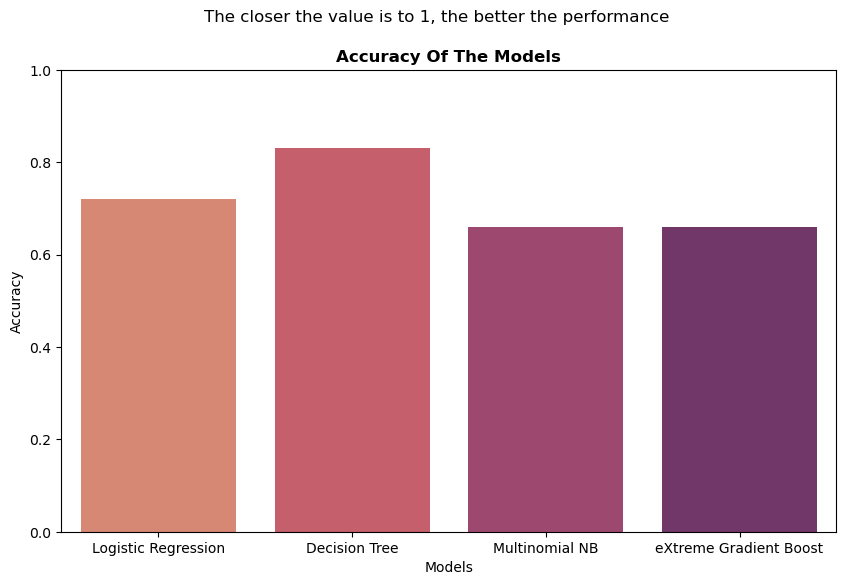

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mod_labels, y=acc, palette='flare')
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Of The Models', fontweight='bold')
plt.suptitle('The closer the value is to 1, the better the performance')
plt.show()

#### Conclusion so far:
Since the "Decision Tree Classifier" scored the highest accuracy, I'll be using the same for evaluating the result on the test dataset.

In [ ]:
#Saving progress
with open('final_model.pkl', 'wb') as file:
    pickle.dump(dt, file)

## Stage 4: MODEL TESTING <a id="section-five"></a>
Objectives:
- Initializing the selected model.
- Test it on the test set.

In [ ]:
#Loading the model
with open('/Users/vedansh/Documents/Projects/Internship 1/final_model.pkl', 'rb') as file:
    final_model = pickle.load(file)
final_model

DecisionTreeClassifier(random_state=22)

In [ ]:
#Fitting the final  model on the test set
final_model.fit(X_test, y_test)
y_test_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
f1_score_test = f1_score(y_test, y_test_pred, average='macro')

print("/"*55)
print("\nRESULTS OF THE SELECTED MODEL ON THE TEST DATA:")
print(f"Accuracy: {accuracy:.2f}")
print(f"\nCLASSIFICATION REPORT:\n\n{classification_report(y_test, y_test_pred)}")
print("/"*55)

///////////////////////////////////////////////////////

RESULTS OF THE SELECTED MODEL ON THE TEST DATA:
Accuracy: 0.99

CLASSIFICATION REPORT:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5805
           1       0.99      0.98      0.99      3066
           2       0.99      1.00      0.99     30626

    accuracy                           0.99     39497
   macro avg       0.99      0.98      0.99     39497
weighted avg       0.99      0.99      0.99     39497

///////////////////////////////////////////////////////


# Conclusions: <a id="section-six"></a>

In this research, I utilized an e-commerce reviews dataset to conduct sentiment analysis. I cleaned the data, ensured the balancing of sentiment classes, transformed the rows into a vectorized, computer-understandable format, and gained the following insights:
- Logistic Regression Classifer was 72% accurate in predicting the validation set.
- Decision Tree Classifier was 83% accurate in predicting the validation set which makes it the highest among others.
- Multinomial Naïve Bayes Classifier and eXtreme Gradient Boost were 66% accurate in predicting the validation set.
- For some reason, SVC model always got stuck in a perpetual processing state. Hence I excluded it from the analysis. Hyperparameter tuning didn't help either.
- I chose Decision Tree Classifie as the model for final analysis.
- Upon analysis on the test set, Decision Tree Classifier achieved 99% accuracy suggesting that the model generalizes well to unseen data.